<a href="https://colab.research.google.com/github/sjmin-k/Mental-Health-Risk-Classification/blob/main/MindScope_Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project : Mental Health Risk Classification**

This project classify mental health risk levels (Low / Medium / High) based on psychological, lifestyle, and demographic features using machine learning. Examine which features are most predictive of the mental health status

**Steps**
1. Explore all features using visualizations and summary statistics to understand their relationship with mental_health_risk.
2. Select relevant features based on insights
3. Clean and encode the data
4. Train and compare four models (eg, Logistic Regression, Random Forest, XGBoost, LightGBM) using evaluation metrics like accuracy and F1-score.




#Data load

In [ ]:
# Install kagglehub if not already installed
!pip install -q kagglehub[pandas-datasets]

# Import libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the actual CSV file path from the dataset
file_path = "mental_health_dataset.csv"

# Load the dataset using KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mahdimashayekhi/mental-health",
    file_path
)

# Preview the dataset
df.head()


<ipython-input-2-e116f468b72c>:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [ ]:
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

# Exploratory Data Analysis (EDA)
1. missing value
2. encoding the numeric features
3.

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
employment_status,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0


In [ ]:
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


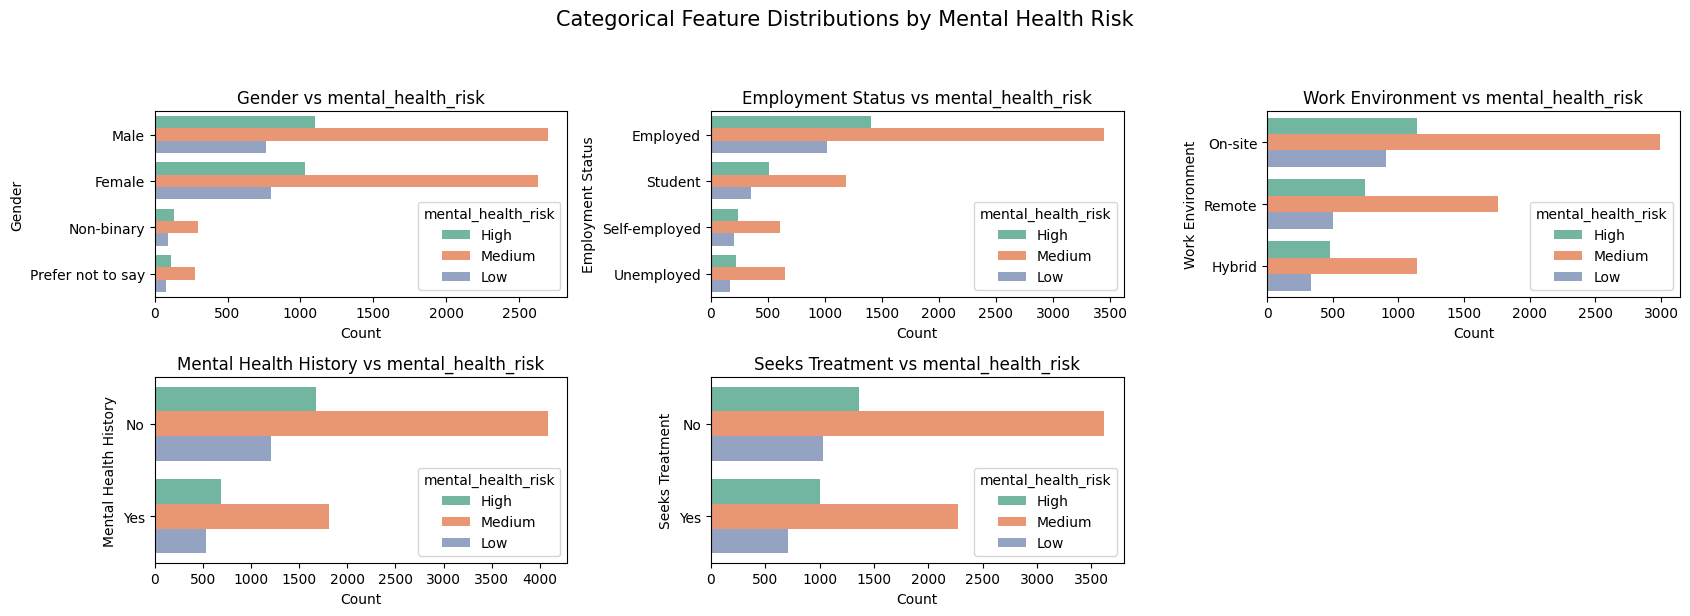

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features
categorical_features = [
    'gender', 'employment_status', 'work_environment',
    'mental_health_history', 'seeks_treatment'
]

# Define target variable
target_variable = 'mental_health_risk'

# Set up a less-wide figure
n_cols = 3
n_rows = (len(categorical_features) + 1) // n_cols
plt.figure(figsize=(17, n_rows * 3))  # Less wide, but still tall enough

# Create subplots
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)

    y_order = df[col].value_counts().index[:10] if df[col].nunique() > 10 else df[col].value_counts().index
    hue_order = ['High', 'Medium', 'Low']

    sns.countplot(
        y=df[col],
        hue=df[target_variable],
        order=y_order,
        hue_order=hue_order,
        palette='Set2'
    )

    plt.title(f'{col.replace("_", " ").title()} vs {target_variable}')
    plt.xlabel("Count")
    plt.ylabel(col.replace("_", " ").title())

# Global title and layout
plt.suptitle('Categorical Feature Distributions by Mental Health Risk', fontsize=15, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#Target Distribution

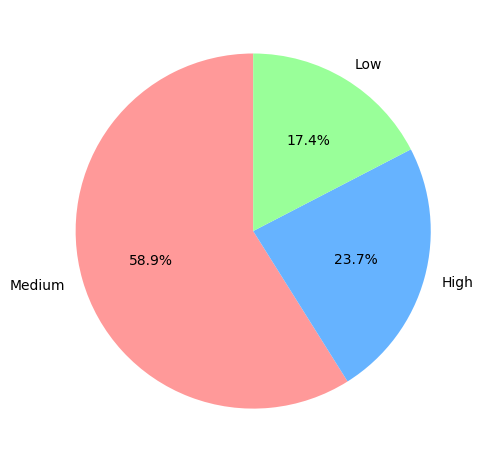

In [ ]:
# Calculate percentages of target
risk_percentages = df['mental_health_risk'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(5, 5))
risk_percentages.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.ylabel("")  # Hide y-axis label
#plt.title("Mental Health Risk Distribution")
plt.tight_layout()
plt.show()

<Axes: xlabel='mental_health_risk'>

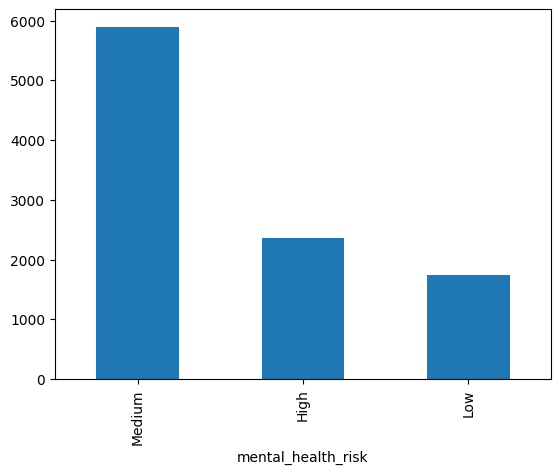

In [ ]:
df['mental_health_risk'].value_counts().plot(kind='bar')

#correlation matrix

📊 Correlation with mental_health_risk:

mental_health_risk        1.000000
productivity_score        0.355313
mental_health_history     0.014070
employment_status         0.010658
social_support_score      0.009553
sleep_hours               0.005257
stress_level              0.000366
work_environment         -0.004312
gender                   -0.006403
age                      -0.008832
physical_activity_days   -0.021678
seeks_treatment          -0.031925
anxiety_score            -0.245533
depression_score         -0.369709
Name: mental_health_risk, dtype: float64


<ipython-input-4-480324ff3c2f>:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


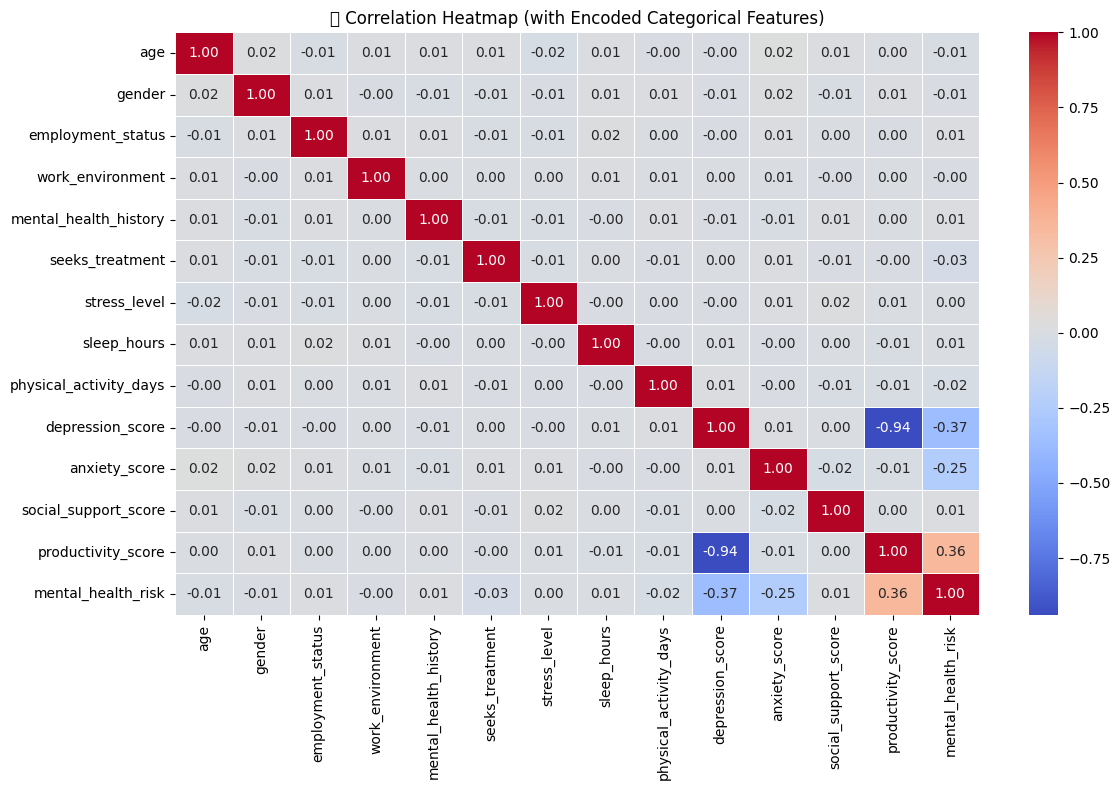

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# encode the categorical features
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# calculate corr
corr = df_encoded.corr(numeric_only=True)

#print the corr num
print("📊 Correlation with mental_health_risk:\n")
print(corr['mental_health_risk'].sort_values(ascending=False))

# visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Heatmap (with Encoded Categorical Features)")
plt.tight_layout()
plt.show()


#Feature Selection & Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# ----------------------------------------
#  Step 1: Encode categorical input features
# ----------------------------------------
df_encoded = df.copy()
le_features = LabelEncoder()

for col in df_encoded.select_dtypes(include='object'):
    if col != 'mental_health_risk':  # exclude the target column for now
        df_encoded[col] = le_features.fit_transform(df_encoded[col])

# ----------------------------------------
#  Step 2: Feature selection
# ----------------------------------------
selected_features = ['productivity_score', 'anxiety_score']
X = df_encoded[selected_features]

# ----------------------------------------
#  Step 3: Encode target + train-test split
# ----------------------------------------
# Use LabelEncoder only once and save mapping
le_target = LabelEncoder()
y = le_target.fit_transform(df_encoded['mental_health_risk'])

# Get class label order
label_order = ['High', 'Medium', 'Low']
label_indices = [le_target.transform([label])[0] for label in label_order]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ----------------------------------------
#  Step 4: Train and evaluate models
# ----------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(
        y_test,
        y_pred,
        labels=label_indices,
        target_names=label_order
    ))



📊 Logistic Regression
Accuracy: 0.8905
              precision    recall  f1-score   support

        High       0.86      0.87      0.86       474
      Medium       0.90      0.92      0.91      1178
         Low       0.90      0.84      0.87       348

    accuracy                           0.89      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000


📊 Random Forest
Accuracy: 0.8565
              precision    recall  f1-score   support

        High       0.82      0.86      0.84       474
      Medium       0.89      0.87      0.88      1178
         Low       0.82      0.81      0.82       348

    accuracy                           0.86      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.86      0.86      0.86      2000


📊 XGBoost
Accuracy: 0.887
              precision    recall  f1-score   support

        High       0.86      0.87      0.86       474
      Medium       0.90     

#Confusion Matrix Visualization


🧩 Confusion Matrix — Logistic Regression


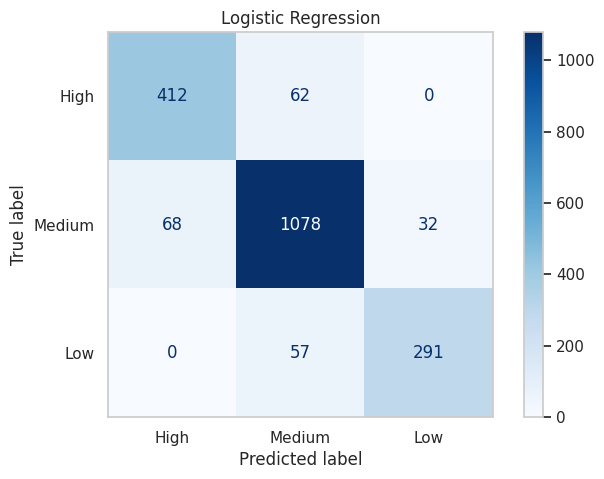


🧩 Confusion Matrix — Random Forest


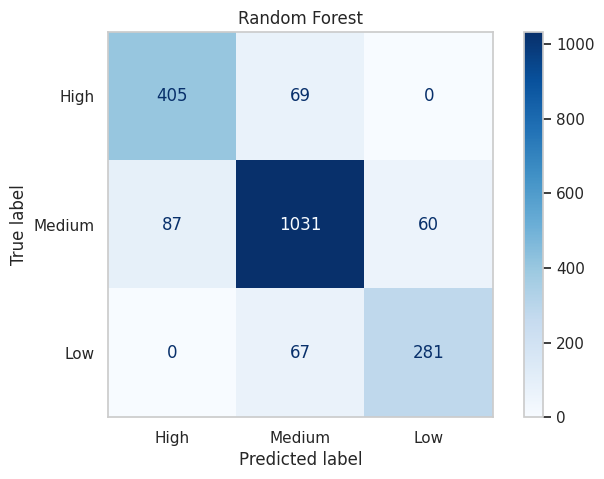


🧩 Confusion Matrix — XGBoost


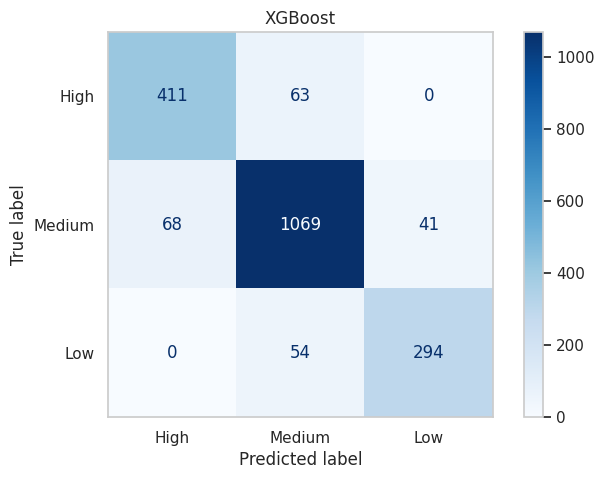


🧩 Confusion Matrix — LightGBM


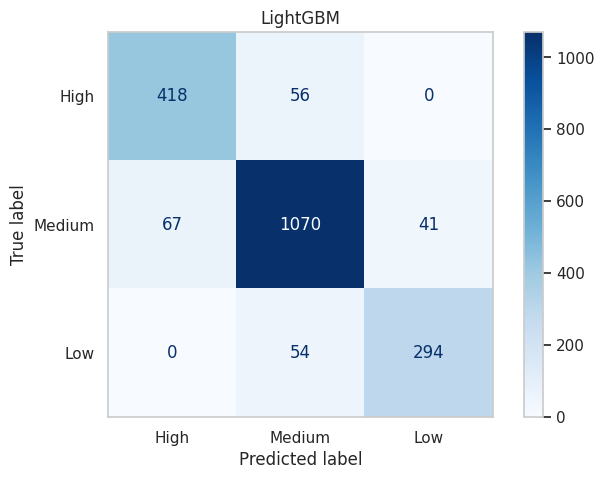

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=label_indices)

    print(f"\n🧩 Confusion Matrix — {name}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_order)
    disp.plot(cmap='Blues')
    plt.grid(False)  # 🔹 Turn off grid
    plt.title(name)
    plt.show()


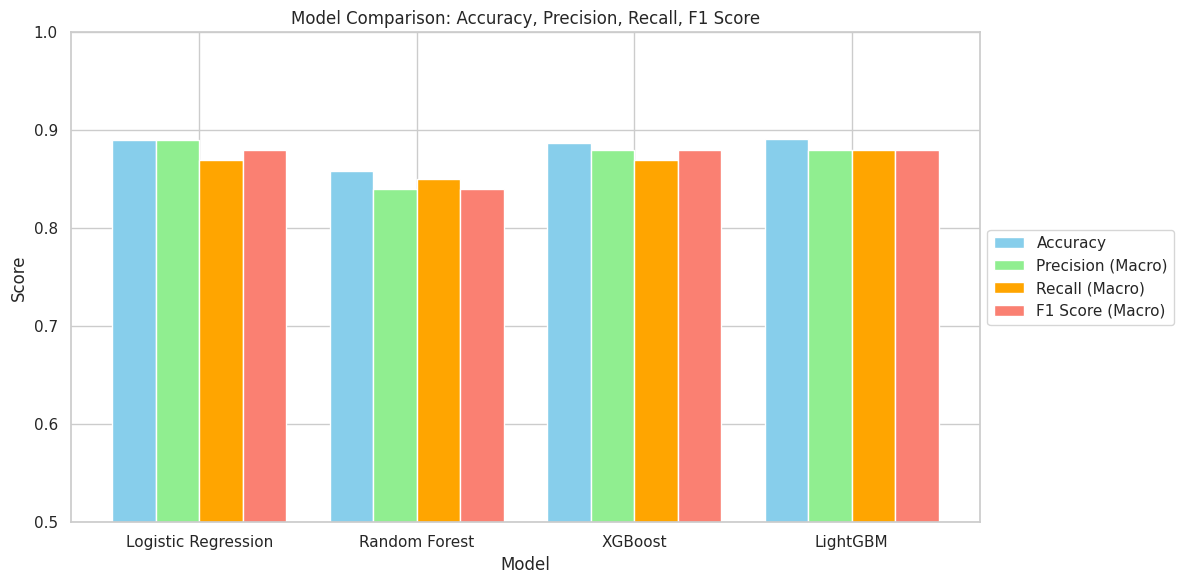

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and evaluation metrics (replace with your actual values if needed)
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
accuracies = [0.8905, 0.8585, 0.8870, 0.8910]
precision_macros = [0.89, 0.84, 0.88, 0.88]
recall_macros = [0.87, 0.85, 0.87, 0.88]
f1_macros = [0.88, 0.84, 0.88, 0.88]

# Plotting
x = np.arange(len(model_names))
bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*bar_width, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*bar_width, precision_macros, width=bar_width, label='Precision (Macro)', color='lightgreen')
plt.bar(x + 0.5*bar_width, recall_macros, width=bar_width, label='Recall (Macro)', color='orange')
plt.bar(x + 1.5*bar_width, f1_macros, width=bar_width, label='F1 Score (Macro)', color='salmon')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.xticks(x, model_names)
plt.ylim(0.5, 1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


#Improvment : LightGBM Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='recall_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_order))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 2
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w